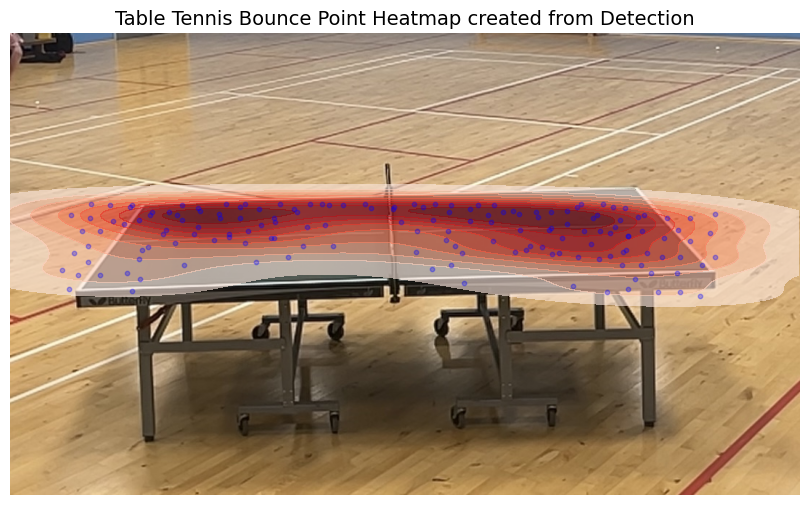

In [58]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

# Load bounce points dataset
df = pd.read_csv("/kaggle/input/bouncepoints/bounce_points.csv")

# Load the image
img = mpimg.imread("/kaggle/input/tabledata/TTtable.jpg")

# Clean out any infinite values just in case (optional)
df = df.dropna()
fig, ax = plt.subplots(figsize=(12, 6))

#get dimensions 
height, width, _ = img.shape

# Show the image
ax.imshow(img, extent=[0, width, height, 0])  #set extent to match pixel space

# Parameters for transformation
x_stretch_factor = 2    # widen horizontally
y_stretch_factor = 2   # stretch vertically
y_shift_amount = -90      #move data up to macth table

# Apply transformations
df['x'] = df['x'].mean() + (df['x'] - df['x'].mean()) * x_stretch_factor
df['y'] = df['y'].mean() + (df['y'] - df['y'].mean()) * y_stretch_factor + y_shift_amount


# Plot heatmap on top of the image
sns.kdeplot(
    x=df['x'],
    y=df['y'],
    ax=ax,
    cmap='Reds',
    fill=True,
    alpha=0.6,
    bw_adjust=1.0,
    thresh=0.05  # controls minimum density shown
)

#scatter the exact bounce points in blue
ax.scatter(df['x'], df['y'], color='blue', s=10, alpha=0.3)

ax.set_xlim([0, width])
ax.set_ylim([height, 0])  #flip y-axis to match image coordinates


ax.axis('off')


plt.title("Table Tennis Bounce Point Heatmap created from Detection", fontsize=14)

plt.show()


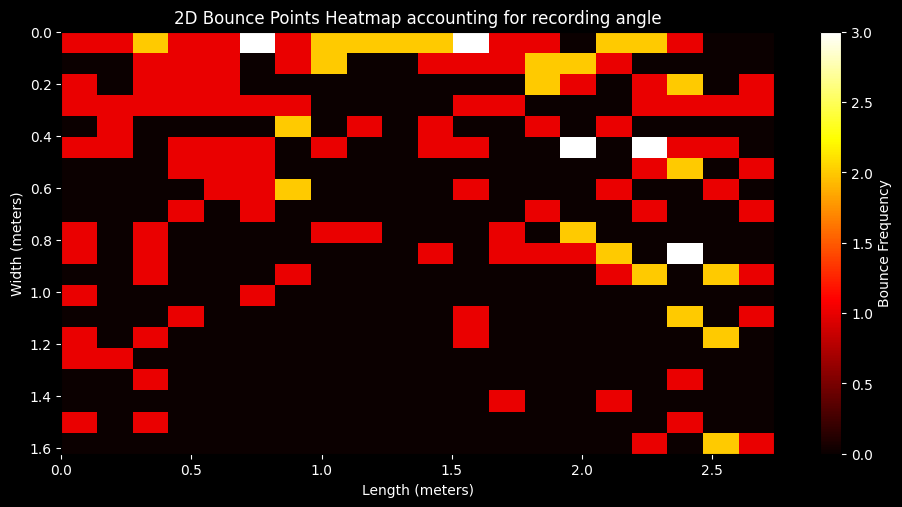

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("/kaggle/input/bouncepoints/bounce_points.csv")

# Normalize to meters
table_width = 2.74
table_length = 1.525
df['x_m'] = (df['x'] - df['x'].min()) / (df['x'].max() - df['x'].min()) * table_width
df['y_m'] = (df['y'] - df['y'].min()) / (df['y'].max() - df['y'].min()) * table_length

#deskew factor used to try and counter the angle from which data recorded from
theta_deg = 20
deskew_factor = np.cos(np.deg2rad(theta_deg))
df['y_deskew'] = df['y_m'] / deskew_factor

# Plot 2D histogram
fig, ax = plt.subplots(figsize=(10, 5), facecolor='black')
ax.set_facecolor('black')

# Create histogram
hist = ax.hist2d(
    df['x_m'], df['y_deskew'],
    bins=[20, 20],
    cmap='hot',
    cmin=0
)

# Colorbar with bounce frequency
cbar = plt.colorbar(hist[3], ax=ax)
cbar.set_label("Bounce Frequency", color='white')
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(cbar.ax.get_yticklabels(), color='white')

# Labels and axis formatting
ax.set_title("2D Bounce Points Heatmap accounting for recording angle", color='white')
ax.set_xlabel("Length (meters)", color='white')
ax.set_ylabel("Width (meters)", color='white')
ax.tick_params(colors='white')
ax.invert_yaxis()
ax.set_aspect('equal')

plt.tight_layout()
plt.show()
